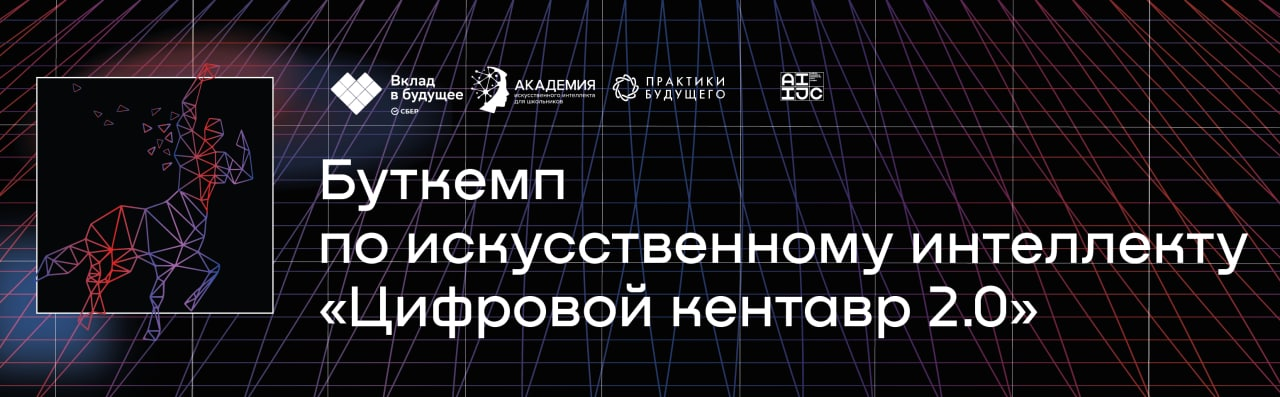

В этой лекции мы познакомимся с простейшими понятиями и результатами линейной алгебры. <br>
 Линейная алгебра является одной из наиболее прикладных математических дисциплин. Она используется везде - от анализа данных и физики до систем автоматического интегрирования и компьютерной графики. Многие законы, описывающие мироустройство, в сути своей линейны. <br>
В анализе данных линейная алгебра возникает естественным путем, так как о табличных данных можно думать как о матрицах. Например, многие рекомендательные алгоритмы долгое время были основаны на матричной факторизации. Впрочем, обо всем по порядку.



Далее просто запускайте код для визуализации того, что происходит

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Базовые понятия

Базовое понятие линейной алгебры - вектор и векторное(линейное) пространство. В школе говорят, что вектор - это множество направленных отрезков, смотрящих в одну сторону и имеющих одну длину, либо же направленный отрезок, отложенный из начала координат.<br>
Давайте рассмотрим векторы на плоскости. Тогда каждому вектору мы сопоставляем его координаты - то, куда он смотрит по оси x, и то, куда он смотрит по оси y. Какие свойства выполняются для них выполняются?

1) Мы можем их складывать, по правилу параллелограмма - нужно построить параллелограмм на двух наших векторах, и провести из начала координат его диагональ - получим вектор суммы. Тогда координаты тоже будут складываться

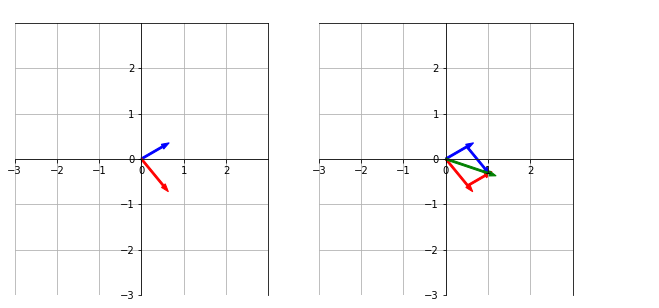

In [20]:
#@title Введите координаты первого и второго вектора для визуализации
x1 = 0.5 #@param {type:"slider", min:-1, max:1, step:0.01}
y1 = 0.27 #@param {type:"slider", min:-1, max:1, step:0.01}
x2 = 0.52 #@param {type:"slider", min:-1, max:1, step:0.01}
y2 = -0.59 #@param {type:"slider", min:-1, max:1, step:0.01}

sgn = lambda x: -1 if x < 0 else 1

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# first_vector = np.array([x1, y1])
# second_vector = np.array([x2, y2])

for i in range(2):
    axes[i].grid()
    axes[i].arrow(0, 0, x1, y1, color="b", width=0.04)
    axes[i].arrow(0, 0, x2, y2, color="r", width=0.04)
    axes[i].set_xticks(np.arange(-3, 3, 1))
    axes[i].set_yticks(np.arange(-3, 3, 1))
    axes[i].set_xlim((-3, 3))
    axes[i].set_ylim((-3, 3))
    axes[i].spines['left'].set_position('center')
    axes[i].spines['bottom'].set_position('center')
    if i == 0:
        axes[i].set_title(label = "Векторы", color='white')
        first_vector = np.array([x1, y1])
    else:
        axes[i].set_title(label = "Векторы с их суммой, полученной по правилу параллелограмма", color='white')
        second_vector = np.array([x2, y2])

step = 1.2
axes[1].arrow(x1, y1, x2 / step, y2 / step, color="b", width=0.04)
axes[1].arrow(x2, y2, x1 / step, y1 / step, color="r", width=0.04)
axes[1].arrow(0, 0, x1 + x2, y1 + y2, color="g", width=0.04)

plt.show()

2) Умножать на число, тогда обе координаты умножатся на это число

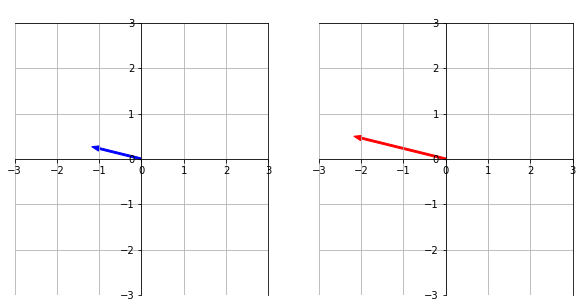

In [19]:
#@title Введите координаты вектора и число, на которое его следует умножить
x1 = -1 #@param {type:"slider", min:-1, max:1, step:0.01}
y1 = 0.23 #@param {type:"slider", min:-1, max:1, step:0.01}
a = 2 #@param {type:"slider", min:-2, max:2, step:0.01}

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
# axes[0].title.set_text("Введенный вектор")
axes[0].set_title(label = "Введенный вектор", color="white")

# axes[1].title.set_text("Введенный вектор, умноженный на число")
axes[1].set_title(label = "Введенный вектор, умноженный на число", color="white")

for i in range(2):
  axes[i].grid()
  axes[i].set_xticks(np.arange(-6, 6, 1))
  axes[i].set_yticks(np.arange(-6, 6, 1))
  axes[i].set_xlim((-3, 3))
  axes[i].set_ylim((-3, 3))
  axes[i].spines['left'].set_position('center')
  axes[i].spines['bottom'].set_position('center')

axes[0].arrow(0, 0, x1, y1, color="b", width=0.04)
axes[1].arrow(0, 0, x1 * a, y1 * a, color="r", width=0.04)

plt.show()

Собственно, это самые важные свойства - векторы можно умножать на числа и складывать между собой, получая в результате таких операций тоже какой-то вектор. <br>
Более того, если у нас есть множество объектов, которые мы можем складывать и умножать на числа, то их можно тоже назвать векторами, а само по себе множество тогда становится линейным пространством. <br>
Например, если у нас есть крокодилы, то мы можем смотреть на их вес и рост, и также складывать их/умножать на числа. Тогда можно ввести "векторное пространство крокодилов". Правда, в нем иногда будут попадаться аномально большие или маленькие особи, но это волшебный мир крокодилов, в нем возможно всё)

**Вторым важным понятием является линейная зависимость и независимость векторов**

Если у нас есть несколько векторов, то они называются линейно зависимыми, если один из них можно представить как сумму других, векторов, умноженных на какие-то числа. <br>
Например, если у нас есть следующие векторы на плоскости (сверху стоит координата по x, снизу - по y): <br>
\begin{matrix}
  \begin{pmatrix}
    1\\
    2
  \end{pmatrix} &
  \begin{pmatrix}
    2\\
    1
  \end{pmatrix} &
  \begin{pmatrix}
    2\\
    2
  \end{pmatrix}
\end{matrix}
То она линейно зависима, т.к.:
\begin{matrix}
  2/3 *
  \begin{pmatrix}
    \begin{pmatrix}
      1\\
      2
    \end{pmatrix} +
    \begin{pmatrix}
      2\\
      1
  \end{pmatrix}
  \end{pmatrix} =
  2/3 * \begin{pmatrix}
    3\\
    3
  \end{pmatrix} =
  \begin{pmatrix}
    2\\
    2
  \end{pmatrix}
\end{matrix}



Или ещё пример линейно зависимой системы. <br>
\begin{matrix}
  \begin{pmatrix}
    1\\
    2\\
    3
  \end{pmatrix} &
  \begin{pmatrix}
    1\\
    1\\
    1
  \end{pmatrix} &
  \begin{pmatrix}
    3\\
    4\\
    5
  \end{pmatrix}
\end{matrix}
\begin{matrix}
  \begin{pmatrix}
    1\\
    2\\
    3
  \end{pmatrix} +
   2 * \begin{pmatrix}
      1\\
      1\\
      1
  \end{pmatrix} =
  \begin{pmatrix}
    3\\
    4\\
    5
  \end{pmatrix}
\end{matrix}

Тогда множество векторов линейно независимо в ином случае. На плоскости, например, мы можем выбрать не более двух линейно независимых векторов - поэтому она и называется "двумерным" пространством. А вот в нашем обычном мире можно выбрать не более трех линейно независимых векторов - поэтому оно и трехмерное.

Давайте посмотрим на геометрическую интерпретацию этого факта. Если у нас на плоскости есть два вектора, не лежащие на одной прямой, и какой-то третий вектор, то мы можем так растянуть и развернуть наши исходные векторы так, чтобы третий вектор являлся диагональю эдакого паралеллограмма

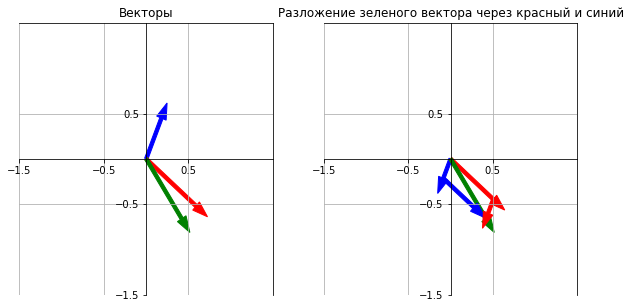

In [21]:
#@title Введите координаты векторов (если первые два вектора будут лежать на одной прямой, будет ошибка)
x1 = 0.18 #@param {type:"slider", min:-1, max:1, step:0.01}
y1 = 0.45 #@param {type:"slider", min:-1, max:1, step:0.01}
x2 = 0.59 #@param {type:"slider", min:-1, max:1, step:0.01}
y2 = -0.52 #@param {type:"slider", min:-1, max:1, step:0.01}
x3 = 0.42 #@param {type:"slider", min:-1, max:1, step:0.01}
y3 = -0.66 #@param {type:"slider", min:-1, max:1, step:0.01}


sgn = lambda x: -1 if x < 0 else 1

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

coef_1, coef_2 = np.linalg.solve([[x1, x2], [y1, y2]], [x3, y3])

axes[0].title.set_text("Векторы")
axes[1].title.set_text("Разложение зеленого вектора через красный и синий")

for i in range(2):
  axes[i].grid()
  axes[i].set_xticks(np.arange(-1.5, 1.5, 1))
  axes[i].set_yticks(np.arange(-1.5, 1.5, 1))
  axes[i].set_xlim((-1.5, 1.5))
  axes[i].set_ylim((-1.5, 1.5))
  axes[i].spines['left'].set_position('center')
  axes[i].spines['bottom'].set_position('center')

for x, y, c in ((x1, y1, "b"), (x2, y2, "r"), (x3, y3, "g")):
  axes[0].arrow(0, 0, x, y, color=c, width=0.04)

x1 *= coef_1
x2 *= coef_2
y1 *= coef_1
y2 *= coef_2

for x, y, c in ((x1, y1, "b"), (x2, y2, "r"), (x3, y3, "g")):
  axes[1].arrow(0, 0, x, y, color=c, width=0.04)

step = 1.4
axes[1].arrow(x1, y1, x2 / step, y2 / step, color="b", width=0.04)
axes[1].arrow(x2, y2, x1 / step, y1 / step, color="r", width=0.04)
plt.show()

Причем те же соображения работают в случае, если мы можем выбрать более трех линейно независимых векторов, т.е. если мы находимся в "многомерном пространстве".

# Матрицы

Фактически, матрица - это простая табличка. Но некоторые операции с матрицами выглядят глупо, если думать о них только как о табличках. Давайте посмотрим, как математики пришли к тому, что матрицы - это действительно удобно и полезно, и не только как таблица.

Изначально они возникли как удобный способ разговора про линейные системы уравнений. Например, у нас есть вот такая система:<br>
\begin{cases}
2x + 3y = 8 \\
x + y = 3
\end{cases}
Чтобы рассуждать об этой системе, решать её, что-то ещё сделать, нам ведь важны только коэффициенты перед переменными и коэффициенты справа, ведь так? Тогда давайте просто запишем их - слева коэффициенты в табличку, а справа коэффициенты в столбец. Получим: <br>
\begin{equation}
A = 
\begin{pmatrix}
2 & 3 \\
1 & 1
\end{pmatrix}
\end{equation}
\begin{equation}
b = \begin{pmatrix}
8 \\
3
\end{pmatrix}
\end{equation}
И этой информации нам достаточно, чтобы что-то делать с системой. Но, если подумать, то переменные - тоже стобец чисел, но уже вместо чисел там как раз наши значки - x и y. Тогда, чтобы все это вместе увязать, придумали такое правило умножения матриц (оно появляется не только здесь, и дальше будет дана более фундаментальная мотивация именно такого умножения). Что если мы умножаем две матрицы - A и B, и возьмем i-ую строку матрицы A и j-ый столбец матрицы B, то в матрице C=AB на i-ой строке j-ом столбце будет стоять следующее число: берем i-ую строку матрицы А и j-ый столбец матрицы B, и начинаем по ним одновременно идти, перемножая соответствующие элементы. То есть первый элемент строки A на первый элемент столбца B, второй элемент строки A на второй элемент строки B и так далее. Звучит страшно, глупо и непонятно? НО!

Тогда нашу систему можно очень красиво и лаконично записать в следующем виде:
\begin{equation}
X = \begin{pmatrix}
x\\
y
\end{pmatrix}
\end{equation}
\begin{equation}
AX = b
\end{equation}
Действительно, что происходит? Возьмем первую строку матрицы A - это будет (2, 3), и первый столбец матрицы X (он единственный) - это (x, y). Тогда если мы первый элемент строки умножим на первый элемент столбца и второй элемент строки умножим на второй элемент столбца, и получим как раз нужное - 2x + 3y. И это же должно быть равно первому элементу b, то есть 8. Магия!

Сейчас будет более крутой пример и к нему будут красивые визуализации.

Пусть у нас есть, например, такое преобразование - повернуть все вектора на плоскости на 90 градусов. И мы возьмем два линейно независимых вектора - (0, 1) и (1, 0) (т.к. мы не можем взять больше двух линейно независимых векторов на плоскости, то такая система называется базисом). Как мы знаем из первого пункта, если мы возьмем какой-то третий вектор к ним, то система станет линейно зависимой => любой вектор на плоскости можно представить как сумму наших двоих, более того, коэффициенты будут совпадать с координатами самого вектора. Давайте посмотрим, куда перейдут наши вектора при повороте. (0, 1) перейдет в (-1, 0), а (1, 0) перейдет в (0, 1). При этом, если мы повернем какие-то два вектора и сложим, то результат будет такой же, как если бы мы сначала сложили два вектора, а потом повернули их сумму (так как просто поворачивается параллелограмм). Также будет и с умножением на число. Значит, такое преобразование называется линейным, ибо оно сохраняет сумму и умножение на число.

А теперь волшебство: давайте запишем вектора, куда переходят наши (1, 0) и (0, 1) в матрицу. Получим следующее: 
\begin{equation}
A = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\end{equation}
Возьмем какой-то вектор, например (2, 1), и умножим слева его на матрицу A, и посмотрим что получилось. 
\begin{equation}
x = \begin{pmatrix}
2 \\
1
\end{pmatrix}\\
Ax = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix} * \begin{pmatrix}
2 \\
1
\end{pmatrix} = 
\begin{pmatrix}
-1 \\
2
\end{pmatrix}
\end{equation}
Это же ровно координаты вектора (2, 1), повернутого на 90 градусов! В общем случае, если у нас какой-то угол α, то матрицу для поворота на этот угол против часовой стрелки будет выглядеть так:
\begin{pmatrix}
cos(\alpha) & - sin(\alpha) \\
sin(\alpha) & cos(\alpha)
\end{pmatrix}
Можете в этом убедиться дальше, в визуализаторе

Матрица преобразования
|0.00 -1.00|
|1.00 0.00|
Новые координаты вектора: (-1.00, 1.00)


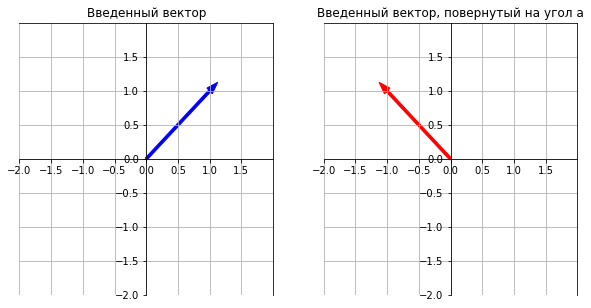

In [22]:
#@title Введите координаты вектора и угол поворота, в градусах
x1 = 1 #@param {type:"slider", min:-1, max:1, step:0.01}
y1 = 1 #@param {type:"slider", min:-1, max:1, step:0.01}
a = "90" #@param {type:"string"}
a = float(a)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].title.set_text("Введенный вектор")
axes[1].title.set_text("Введенный вектор, повернутый на угол a")


for i in range(2):
  axes[i].grid()
  axes[i].set_xticks(np.arange(-2, 2, 0.5))
  axes[i].set_yticks(np.arange(-2, 2, 0.5))
  axes[i].set_xlim((-2, 2))
  axes[i].set_ylim((-2, 2))
  axes[i].spines['left'].set_position('center')
  axes[i].spines['bottom'].set_position('center')
angle = a/180 * np.pi
A = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x = np.array([x1, y1])
axes[0].arrow(0, 0, x1, y1, color="b", width=0.04)
print("Матрица преобразования")
for i in range(2):
  print("|", end="")
  print(f"{A[i, 0]:.2f} {A[i, 1]:.2f}", end="")
  print("|")

x = A @ x
x1, y1 = x
print(f"Новые координаты вектора: ({x1:.2f}, {y1:.2f})")
axes[1].arrow(0, 0, x1, y1, color="r", width=0.04)

plt.show()

Такие соображения можно применить к любому "линейному" преобразованию (то есть сумму векторов переводящую в сумму, и вектор умноженный на число переводящее в вектор, умноженный на число). Если записать это более формально, то линейное преобразование это преобразование со следующими свойствами: 
\begin{equation}
ϕ(x + y) = \phi(x) + \phi(y)
\\
\phi(a*x)=a*\phi(x)
\end{equation}
Соответственно, матрицы, как и введенное именно таким образом матричное умножение, помогает легко записывать сложные операции вроде поворотов плоскости, растяжений, и не только :)

# А причем тут машин лернинг?

1. Линейная регрессия в хорошем случае и обратные матрицы

Не будем разбираться, когда именно так происходит, но для почти всех матриц, при условии что они квадратные, существует обратная матрица - 
\begin{equation}
B = A^{-1}
\end{equation}
Такая, что
\begin{equation}
A*B = B*A = E
\end{equation}
Где E - единичная матрица, т.е. матрица, у которой на диагонали стоят 1, а во всех остальных местах - 0. Можно заметить, что AE=EA=A, но это не так важно сейчас.
То есть обратные матрицы это как бы "отрицательная степень" для нашей матрицы. Ибо нормальным образом матрицы мы делить не умеем, но вот искать обратные и тем самым "сокращать" - умеем.
В частности, если у нас есть система уравнений, то можно её очень элегантно решить:
\begin{equation}
Ax=b
\\
x=A^{-1}b
\end{equation}

Также существует операция транспонирования, она нам дальше понадобится - обозначается:
 \begin{equation}A^T\end{equation}
 И означает, что у матрицы строки становятся столбцами, т.е. она как бы переворачивается.

И это уже крутой результат - решать системы уравнений в общем виде(если решение только одно). Посмотрим на более прикладную задачу.

Пусть у нас есть точки на плоскости, и для каждой точки есть какой-то параметр, например, значение температуры. И мы предполагаем, что зависимость линейная (т.е. чем больше координаты точки, тем больше её температура, например). Тогда как мы можем записать "Возьмем координаты первой точки, координаты второй точки и умножим как такие-то коэффициенты"? С помощью матриц! Если у нас в матрице X строчка состоит из первой координаты и второй координаты точки, столбец y содержит температуру для этих точек, то пусть матрица A - коэффициенты, с которыми температура зависит от координат.
Тогда все это принимает вот такой вид:
\begin{equation}
XA=y
\end{equation}

Но как решить такую систему? Ведь у нас наблюдений больше, чем переменных. Мы можем сделать это приближенно, если у нас данные хорошие, с помощью известных нам умножений матриц, транспонирования и взятия обратных. Дальше происходит алгебраический фокус - я домножу на транспонированную матрицу X слева, чтобы слева от A стояло что-то квадратное:
\begin{equation}
XA=y\\
X^{T}XA=X^{T}y\\
A=(X^{T}X)^{-1}X^{T}y
\end{equation}
То есть мы смогли через матрицу точек и матрицу температур выразить коэффициенты! Давайте посмотрим на примере.

Пусть есть следующие наблюдения:
\begin{equation}
X =
\begin{pmatrix}
1 & 4\\
2 & 6\\
3 & 8\\
4 & 10\\
5 & 12
\end{pmatrix}
, y= \begin{pmatrix}
2.9 \\ 5.2 \\ 7.1 \\ 8.6 \\ 11
\end{pmatrix}
\end{equation}
Где X - координаты точек на столе, y - температура стола. Тогда применив нашу формулу, получим что A = (0.88, 0.54):
\begin{equation}
X*\begin{pmatrix} 0.88 \\ 0.54\end{pmatrix} = \begin{pmatrix} 3.04 \\  5 \\  6.96 \\ 8.92 \\ 10.88 \end{pmatrix}
\end{equation}
Очень похоже на y, значит формула работает и линейная зависимость есть :)
Ну и давайте посмотрим на то, как это выглядит. Фактически, вот это вот выражение y=0.88 * x1 + 0.54 * x2 задает нам плоскость, максимально близкую к нашим точкам. Давайте это и нарисуем

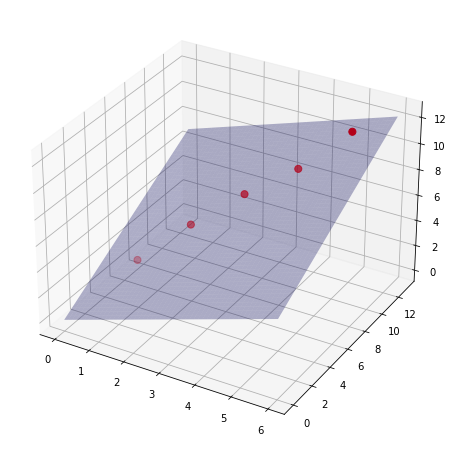

In [27]:
from mpl_toolkits.mplot3d import Axes3D
X = np.array([[1, 2, 3, 4, 5], [4, 6, 8, 10, 12]]).T
y = np.array([2.9, 5.2, 7.1, 8.6, 11])
A = np.linalg.inv(X.T @ X) @ (X.T @ y)
tX, tY = np.mgrid[0:6:1000j, 0:13:1000j]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(tX, tY, A[0] * tX + A[1] * tY, color=(0, 0, 1, 0.3), shade=10);
ax.scatter(X[:, 0], X[:, 1], y, s=50, c="r");

Полученная плоскость действительно хорошо приближает нашу зависимость!
Зачастую данные бывают не такими хорошими, либо считать обратную матрицу очень дорого (примерно n^3 операций, где n - размер матрицы X на X транспонированную), поэтому пользуются градиентным спуском и прочими вещами, которые вам расскажут дальше.

# Сингулярное разложение и рекомендательные системы

Давайте поверим мне, что матрицу можно представить в следующем виде: 
\begin{equation}
A=UΣV^{T}
\end{equation}
Где у Σ числа есть только на диагонали, причем они убывают, а U и V - какие-то матрицы. Это называется сингулярное разложение, или же SVD.
Оно имеет множество применений, например, мы можем отрезать соответствующие части этих матриц, перемножить их и получить приближение нашей матрицы с помощью трех более маленьких. Так можно, например, сжимать информацию, или чистить изображения от шума, т.к. убирая последние строки и столбцы в Σ, где стоят самые маленькие числа, мы как бы убираем наименее важные признаки.

У сингулярного разложения есть ещё одно геометрическое объяснение. Cингулярное разложение раскладывает наше преобразование в поворот, растяжение и ещё один поворот. Правда, делает это оно для определенного базиса, который ещё нужно найти. Визуализация последовательного применения \begin{equation}V^{T}, \Sigma, U\end{equation} с нашими векторами (1, 0) и (0, 1):

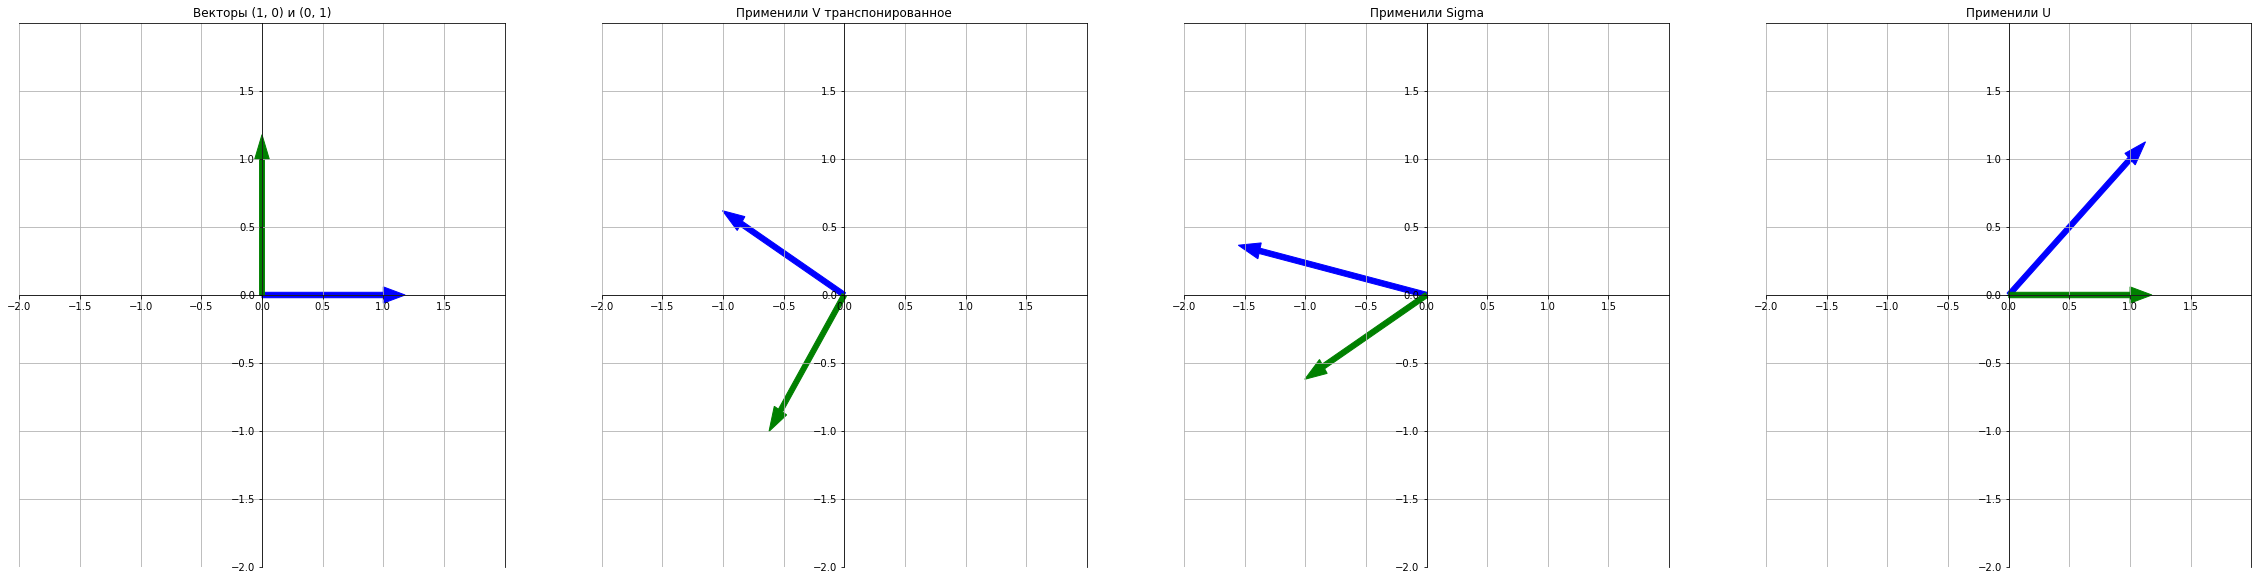

In [32]:
#@title Введите матрицу преобразования
a11 = 1 #@param {type:"slider", min:-1, max:1, step:0.01}
a12 = 1 #@param {type:"slider", min:-1, max:1, step:0.01}
a21 = 1 #@param {type:"slider", min:-1, max:1, step:0.01}
a22 = 0 #@param {type:"slider", min:-1, max:1, step:0.01}

fig, axes = plt.subplots(ncols=4, figsize=(40, 10))
axes[0].title.set_text("Векторы (1, 0) и (0, 1)")
axes[1].title.set_text("Применили V транспонированное")
axes[2].title.set_text("Применили Sigma")
axes[3].title.set_text("Применили U")
A = np.array([[a11, a12], [a21, a22]])
U, Sigma, V = np.linalg.svd(A)
Sigma = np.diag(Sigma)
matrices = [np.eye(2, 2), V, Sigma, U]
vectors = np.array([[1, 0], [0, 1]])
c = ["b", "g"]
for i in range(4):
  axes[i].grid()
  axes[i].set_xticks(np.arange(-2, 2, 0.5))
  axes[i].set_yticks(np.arange(-2, 2, 0.5))
  axes[i].set_xlim((-2, 2))
  axes[i].set_ylim((-2, 2))
  axes[i].spines['left'].set_position('center')
  axes[i].spines['bottom'].set_position('center')
  vectors = matrices[i] @ vectors
  for j in range(2):
    axes[i].arrow(0, 0, vectors[0, j], vectors[1, j], color=c[j], width=0.04)



Что же на самом деле происходит? Мы можем это интерпретировать следующим образом. В U лежит какое-то признаковое представление строк нашей матрицы A (т.к. строк в U столько же сколько и в A), в V - представление столбцов, а в Σ - важности этих признаков. <br>
Эта неформальная трактовка позволила получить интересный результат. 

Пусть матрица A - табличка с оценками фильмов пользователями, то есть строки таблички - пользователи, столбцы - фильмы, и на пересечении строки и столбца стоит оценка соответствующего пользователя соответствующему фильму. Теперь с этими представлениями мы можем делать уже что хотим - например, обучать другие модели предсказывать оценки фильмов пользователей, просто засовывая туда полученные признаки.

На этом все, спасибо за внимание!
Контакты лектора: ТГ - @AncestorsOfGods, почта - kutuzov.nv@phystech.edu